In [109]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [110]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Non-linear Transformation:

$\vec{x} =\left(\!
    \begin{array}{c}
      x_1 \\
      x_2
    \end{array}
  \!\right) $ Wir haben Datenpunkte mit z.B. 2 Features.  
  
$\vec{z} = \phi(\vec{x})$   Wir wollen dann eine Transformation mit dem Grad=2 ausführen.  

$\vec{z} =\left(\!
    \begin{array}{c}
      z_1 \\
      \vdots \\
      z_6
    \end{array}
  \!\right) $ Daraus resultierenden dann (in dem Beispiel) 6 Features.  

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

x = dataset.data[:, :2] # Feature 0 und 1
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # Train = 0.7, Test = 0.3

deg = 2
pf = PolynomialFeatures(degree=deg)
pf.fit(x_train)

x_trans_train = pf.transform(x_train)
x_trans_test = pf.transform(x_test)

print(pf.n_input_features_)
print(pf.n_output_features_)

2
6


In [112]:
print(pf.get_feature_names())

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']


#### Polynomial Regression:

$\vec{y} = \mathbf{Z}\vec{\beta} + \vec{\epsilon}$  
$\mathbf{Z}$ ist hier dann der Datensatz nach der Transformation.

In [113]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_trans_train, y_train)

score = linear.score(x_trans_test, y_test)
print(score)

0.25268138836797116


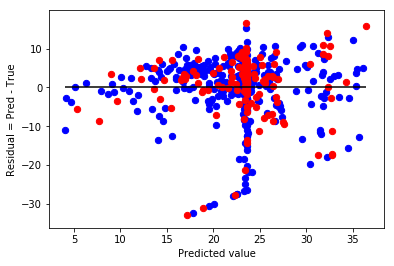

In [114]:
# Residual Plot (Restwert)
import matplotlib.pyplot as plt

train_pred = linear.predict(x_trans_train)
test_pred = linear.predict(x_trans_test)

min_val = min(min(train_pred), min(test_pred))
max_val = max(max(train_pred), max(test_pred))

plt.scatter(train_pred, train_pred - y_train, color="blue", s=40)
plt.scatter(test_pred, test_pred - y_test, color="red", s=40)
plt.hlines(y=0, xmin=min_val, xmax=max_val)
plt.xlabel("Predicted value")
plt.ylabel("Residual = Pred - True")
plt.show()